In [1]:
# Import the pandas library in order to read, transform and manipulate the data
import pandas as pd

# Import matplotlib to visualise the data
import matplotlib.pyplot as plt

# Import the sklearn library in order to implement machine learning algorithms. Note, that we only import the 
# functions we'll need from sklearn (cluster & preprocessing).
from sklearn.cluster import KMeans

# From sklearn import a function that allows us to scale the our data
from sklearn.preprocessing import scale

# Command that enables us to display the graphs in our Jupyter notebook (right here!)
%matplotlib inline

In [2]:
# To import, as we've seen before, we use the pandas read_csv function!
contents = pd.read_csv('hackney.csv', encoding='ANSI')

In [3]:
# First let's look at our data 
contents.head()

,Wards in Hackney,Average Age,Average income
0,Brownswood,33.2,"£48,860.00"
1,Cazenove,29.2,"£46,380.00"
2,Chatham,32.1,"£39,570.00"
3,Clissold,33.6,"£56,050.00"
4,Dalston,32.8,"£46,500.00"


In [4]:
# Let's check the columns
contents.columns

Index(['Wards in Hackney', 'Average Age', 'Average income'], dtype='object')

In [5]:
# Shortening the column names
contents.columns = ['ward', 'age', 'income']

In [6]:
contents.columns

Index(['ward', 'age', 'income'], dtype='object')

In [7]:
# Use the info() function
contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
ward      19 non-null object
age       19 non-null float64
income    19 non-null object
dtypes: float64(1), object(2)
memory usage: 536.0+ bytes


In [8]:
# Looking at the first 5 rows reveals that each value has a '£' at the leading it. Python won't understand this 
# is a currency symbol and will automatically assume the values are 'objects' as opposed to numbers
contents['income'].head()

0    £48,860.00
1    £46,380.00
2    £39,570.00
3    £56,050.00
4    £46,500.00
Name: income, dtype: object

In [9]:
# We need to overwrite the income column however with this new change
contents['income'] = contents['income'].str.strip('£')

# Let's check our data 
contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
ward      19 non-null object
age       19 non-null float64
income    19 non-null object
dtypes: float64(1), object(2)
memory usage: 536.0+ bytes


In [10]:

# As before, we need to remove the comma character in each of the values. To do this however, we can't use the 
# strip function as before. We can use the replace function however. 
contents['income'] = contents['income'].replace(',','', regex = True)

# Let's take a look 
print(contents['income'])

0     48860.00
1     46380.00
2     39570.00
3     56050.00
4     46500.00
5     47560.00
6     42840.00
7     43360.00
8     43830.00
9     42490.00
10    38930.00
11    42650.00
12    48700.00
13    43230.00
14    44620.00
15    40810.00
16    51920.00
17    45410.00
18    40010.00
Name: income, dtype: object


In [11]:
# However, this has only removed the commas. Now we need to convert to float! Thus,
contents['income'] = contents['income'].astype(float)

# Check data type
contents['income'].dtype

dtype('float64')

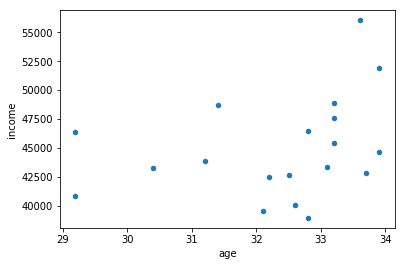

In [12]:
# Since both are numeric, we need to plot them on a scatter graph
contents.plot.scatter(x='age', y='income')

In [13]:
# First we have to drop the 'ward' column as it is not numeric.
contents = contents.drop(['ward'], axis=1)

# Let's see how this looks now
contents

# Notice how

,age,income
0,33.2,48860.0
1,29.2,46380.0
2,32.1,39570.0
3,33.6,56050.0
4,32.8,46500.0
5,33.2,47560.0
6,33.7,42840.0
7,33.1,43360.0
8,31.2,43830.0
9,32.2,42490.0


In [14]:
# Let's run the kmeans function and store the result in our variable, 'model'
model = KMeans(n_clusters=5)

# Now let's fit our kmeans model to our data. 
model.fit(scale(contents))

# Note that we should always scale our data, as variables with bigger distances 
# between points -- e.g. income in our case -- than others -- e.g. age -- will influence 
# our clustering model more! To do this, we use the 'scale' function from sklearn.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# To add a column, use the same syntax as calling a column, using []. We use the labels_ attribute of our model here.
# Feel free to explore the other attributes of our kmeans model. 
contents['cluster'] = model.labels_

In [16]:
# As we can see, our model has now added a column! This represents which cluster our data point belongs to 
# I.e. cluster 0, 1, 2, 3, or 4
contents

,age,income,cluster
0,33.2,48860.0,0
1,29.2,46380.0,4
2,32.1,39570.0,3
3,33.6,56050.0,2
4,32.8,46500.0,0
5,33.2,47560.0,0
6,33.7,42840.0,0
7,33.1,43360.0,0
8,31.2,43830.0,1
9,32.2,42490.0,3


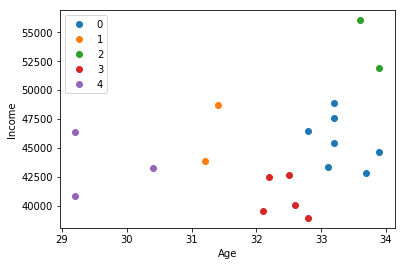

In [17]:
# First we create a group for each cluster using the groupby function
groups = contents.groupby('cluster')

#Plot the clusters!
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age, group.income, marker='o', linestyle='', label=name)

# Add axis labels appropriately
plt.xlabel('Age')
plt.ylabel('Income')
ax.legend()
plt.show()

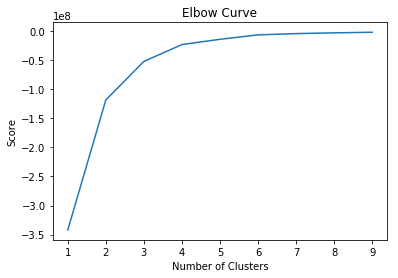

In [18]:
# WSS elbow test

# First specify what will go on our X and Y axes
X = contents[['age']]
Y = contents[['income']]

# 
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()